## Examen Parcial

In [1]:
import sys
sys.path.insert(0, "..")

from algorithms.simplex_algorithms import *
from algorithms.basic_solution import basic_solutions, get_all_vertex
import numpy as np
import sympy as sp

np.set_printoptions(suppress=True, linewidth=np.nan)


#### 1. Muestre que las región factible del siguiente modelo LO es no acotado, y que este tiene soluciones óptimas múltiples.

\begin{align*}
\max -2x_1 + x_2 + x_3\\
s.t. -x_1 + x_2 + x_3 \le 2\\
            x_1 - x_2 + x_3 \le 2\\
            x_1, x_2 \ge 0, x_3 \text{ free}
\end{align*}

Determine todos los vértices (puntos extremos) y direcciones extremas de la región factible.

**Solución**

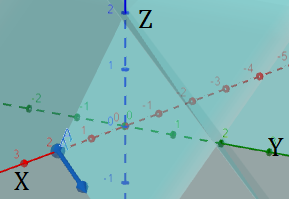

**Método 1**: el LO es no acotado si el método simplex hay una columna positiva con elementos negativos. Tomando como vector costo $c=(1, 1, 0)$, se mostrará que no es acotado. Y tiene múltiples soluciones si existe un elemento zero en los costos no básicos.

In [2]:
A = np.array([[-1, 1, 1, 1, 0.],
              [1, -1, 1, 0, 1.]])

b = np.array([2, 2.])

c = np.array([1, 1, 0., 0, 0])

basic_indices = [3, 4]

tableau = build_tableau(A, b, c)
simplex(tableau, basic_indices);

vertex = [0. 0. 0. 2. 2.], x_B = [4, 5]
[[ 1.  1.  0.  0.  0.  0.]
 [-1.  1.  1.  1.  0.  2.]
 [ 1. -1.  1.  0.  1.  2.]]
vertex = [2. 0. 0. 4. 0.], x_B = [4, 1]
[[ 0.  2. -1.  0. -1. -2.]
 [ 0.  0.  2.  1.  1.  4.]
 [ 1. -1.  1.  0.  1.  2.]]
The model is unbounded
L = [2. 0. 0. 4. 0.] + λ[ 1.  1.  0. -0.  0.]
L = [2. 0. 0.] + λ[1. 1. 0.]


In [3]:
A = np.array([[-1, 1, 1, -1, 1, 0.],
              [1, -1, 1, -1, 0, 1.]])

b = np.array([2, 2.])

c = np.array([-2, 1, 1., -1, 0, 0])

basic_indices = [4, 5]

tableau = build_tableau(A, b, c)
simplex(tableau, basic_indices);


vertex = [0. 0. 0. 0. 2. 2.], x_B = [5, 6]
[[-2.  1.  1. -1.  0.  0.  0.]
 [-1.  1.  1. -1.  1.  0.  2.]
 [ 1. -1.  1. -1.  0.  1.  2.]]
vertex = [0. 2. 0. 0. 0. 4.], x_B = [2, 6]
[[-1.  0.  0.  0. -1.  0. -2.]
 [-1.  1.  1. -1.  1.  0.  2.]
 [ 0.  0.  2. -2.  1.  1.  4.]]


La columna 2, 3 los costos no básicos son cero por lo que hay múltiples soluciones. 

**Método 2**

Vértices

In [4]:
A_s = sp.Matrix([[-1, 1, 1, -1, 1, 0.],
                 [1, -1, 1, -1, 0, 1.]])

b_s = sp.Matrix([2, 2.])

basic_solutions(A_s, b_s)


Number of combinations: 15
Basic solution 1
Matrix det == 0; not invertible.


Basic solution 2


Basic solution 3


Basic solution 4


Basic solution 5


Basic solution 6


Basic solution 7


Basic solution 8


Basic solution 9


Basic solution 10
Matrix det == 0; not invertible.


Basic solution 11


Basic solution 12


Basic solution 13


Basic solution 14


Basic solution 15


In [5]:
print("Los vértices son")
get_all_vertex(A, b, c[:4])


Los vértices son
x_B=[1, 3], v=[0. 0. 2. 0.], c=2.0
x_B=[1, 5], v=[2. 0. 0. 0.], c=-4.0
x_B=[2, 3], v=[0. 0. 2. 0.], c=2.0
x_B=[2, 6], v=[0. 2. 0. 0.], c=2.0
x_B=[3, 5], v=[0. 0. 2. 0.], c=2.0
x_B=[3, 6], v=[0. 0. 2. 0.], c=2.0
x_B=[5, 6], v=[0. 0. 0. 0.], c=0.0


Una dirección $d$ cumple que, dado $Ax\le b$

\begin{align*}
A(x+td) &\le b, \forall t \ge 0 \\
Ax+tAd &\le b \\
Ad &\le 0
\end{align*}

$Ad = 0, d\ge0$, resolviendo se obtiene
\begin{align*}
\begin{bmatrix}
-1&1&1&-1\\
1&-1&1&-1\\
\end{bmatrix}
\begin{bmatrix}
d_1\\
d_2\\
\end{bmatrix} &= 
\begin{bmatrix}
0\\
0\\
\end{bmatrix}\\
-d_1 + d_2 + d_3 - d_4 &= 0, d_3=d_4\\ 
d_1 - d_2 + d_3 - d_4 &= 0, d_1=d_2\\ 
\end{align*}

Entonces $d=(1, 1, 0)$ es una dirección extrema (región no acotada)

#### 3. Resuelva el siguiente modelo de optimización lineal.

\begin{align*}
\max\quad 3x_1& - 3x_2& + x_3&\\
\text{s.t.} \quad    x_1& + 3x_2& - 2x_3& \ge 5\\
                -3x_1& - 2x_2& + x_3& \le 4\\
\end{align*}
$$x_1, x_2, x_3 \ge 0$$

In [6]:
A = [[1, 3, -2., -1, 0, 1],
     [-3, -2, 1, 0., 1, 0]]

b = [5, 4.]

c = [3, -3, 1, 0, 0.]

c_artificial = [0, 0, 0, 0, 0, -1.]

basic_var = [5, 4]

artificial_var = [5]

tableau = build_tableau(A, b, c_artificial)
two_phases(tableau, c, basic_var, artificial_var);


x_B = [6, 5]
[[ 0.  0.  0.  0.  0. -1.  0.]
 [ 1.  3. -2. -1.  0.  1.  5.]
 [-3. -2.  1.  0.  1.  0.  4.]]
Cost corrected
x_B = [6, 5]
[[ 1.  3. -2. -1.  0.  0.  5.]
 [ 1.  3. -2. -1.  0.  1.  5.]
 [-3. -2.  1.  0.  1.  0.  4.]]
Start phase One
x_B = [2, 5]
[[ 0.          0.          0.          0.          0.         -1.          0.        ]
 [ 0.33333333  1.         -0.66666667 -0.33333333  0.          0.33333333  1.66666667]
 [-2.33333333  0.         -0.33333333 -0.66666667  1.          0.66666667  7.33333333]]
Delete artificial variables and create a new tableau [5]
Start phase two, put original cost
x_B = [2, 5]
[[ 3.         -3.          1.          0.          0.          0.        ]
 [ 0.33333333  1.         -0.66666667 -0.33333333  0.          1.66666667]
 [-2.33333333  0.         -0.33333333 -0.66666667  1.          7.33333333]]
Cost corrected
vertex = [0.         1.66666667 0.         0.         7.33333333], x_B = [2, 5]
[[ 4.          0.         -1.         -1.          0. 

#### 4. Considere el siguiente modelo LO

\begin{align*}
\max \quad          2x_1& + 3x_2& - x_3& -12x_4&\\
\text{s.t.}\quad    -2x_1&-9x_2& +x_3& + 9x_4&\le 0\\ 
                    \frac{1}{3}x_1& + x_2& - \frac{1}{3}x_3& -2x_4& \le 0
\end{align*}
$$x_1, x_2, x_3, x_4 \ge 0$$

Dibuje el grafo de adyacencia simplex.